<a href="https://colab.research.google.com/github/LAlejandro8/preparaci-on-datos-imdb/blob/master/Preparacion_de_los_datos_imdb_(feedback).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.simplefilter("ignore")

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

En particular la regresión Lasso es interpretable:


*   mientras más grande el coeficiente para una feature, más relevante es esta para la regresión.
*   la regresión Lasso trata de seleccionar un pequeño número de features relevantes.

In [0]:
X = pd.read_csv('https://raw.githubusercontent.com/LAlejandro8/preparaci-on-datos-imdb/master/x.csv',encoding='utf-8')

y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [0]:
X = X.drop('gross', axis=1)

In [24]:
X.head()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5


In [0]:
from sklearn.linear_model import Lasso

model = Lasso()

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [27]:
len(X_train)/len(X)

0.75

In [28]:
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
model.score(X_test,y_test)

0.5539067579362678

In [30]:
# Nos devuelve los parametros de una regresion lineal, tomando las features, multiplicarlas por parametros y luego hace una suma
# En otras palabras: Esto nos entrega cada uno de los parametros por el cual sera multiplicado cada feature
model.coef_

array([ 3.08964809e+00, -7.33034473e+04, -5.79137376e+06,  1.45031092e+04,
        2.92566308e+02, -3.89563035e-02,  2.71691479e+07])

In [31]:
# Esto nos da el mismo largo de los features

len(model.coef_)

7

In [0]:
# En model.coef_ hay numero muy grandes, vamos a simplificar mas estos numeros reduciendolos con logaritmo en base 10
# floor me da la parte entera de los valores

var = np.floor(np.log10(np.abs(model.coef_)))

In [34]:
np.floor(np.log10(np.abs(model.coef_)))

array([ 0.,  4.,  6.,  4.,  2., -2.,  7.])

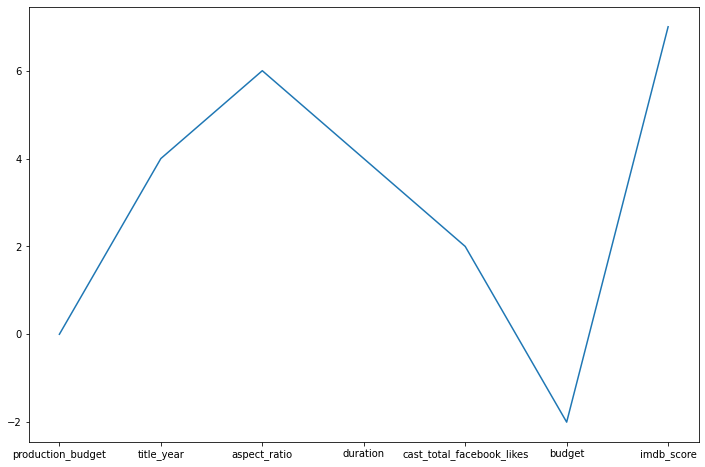

In [33]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(var)
plt.xticks(np.arange(7),list(X.columns));

Esto nos guía a guardar únicamente:



*   production_budget
*   title_year
*   duration
*   cast_total_facebook_likes
*   imdb_score

**Correlación entre variables**

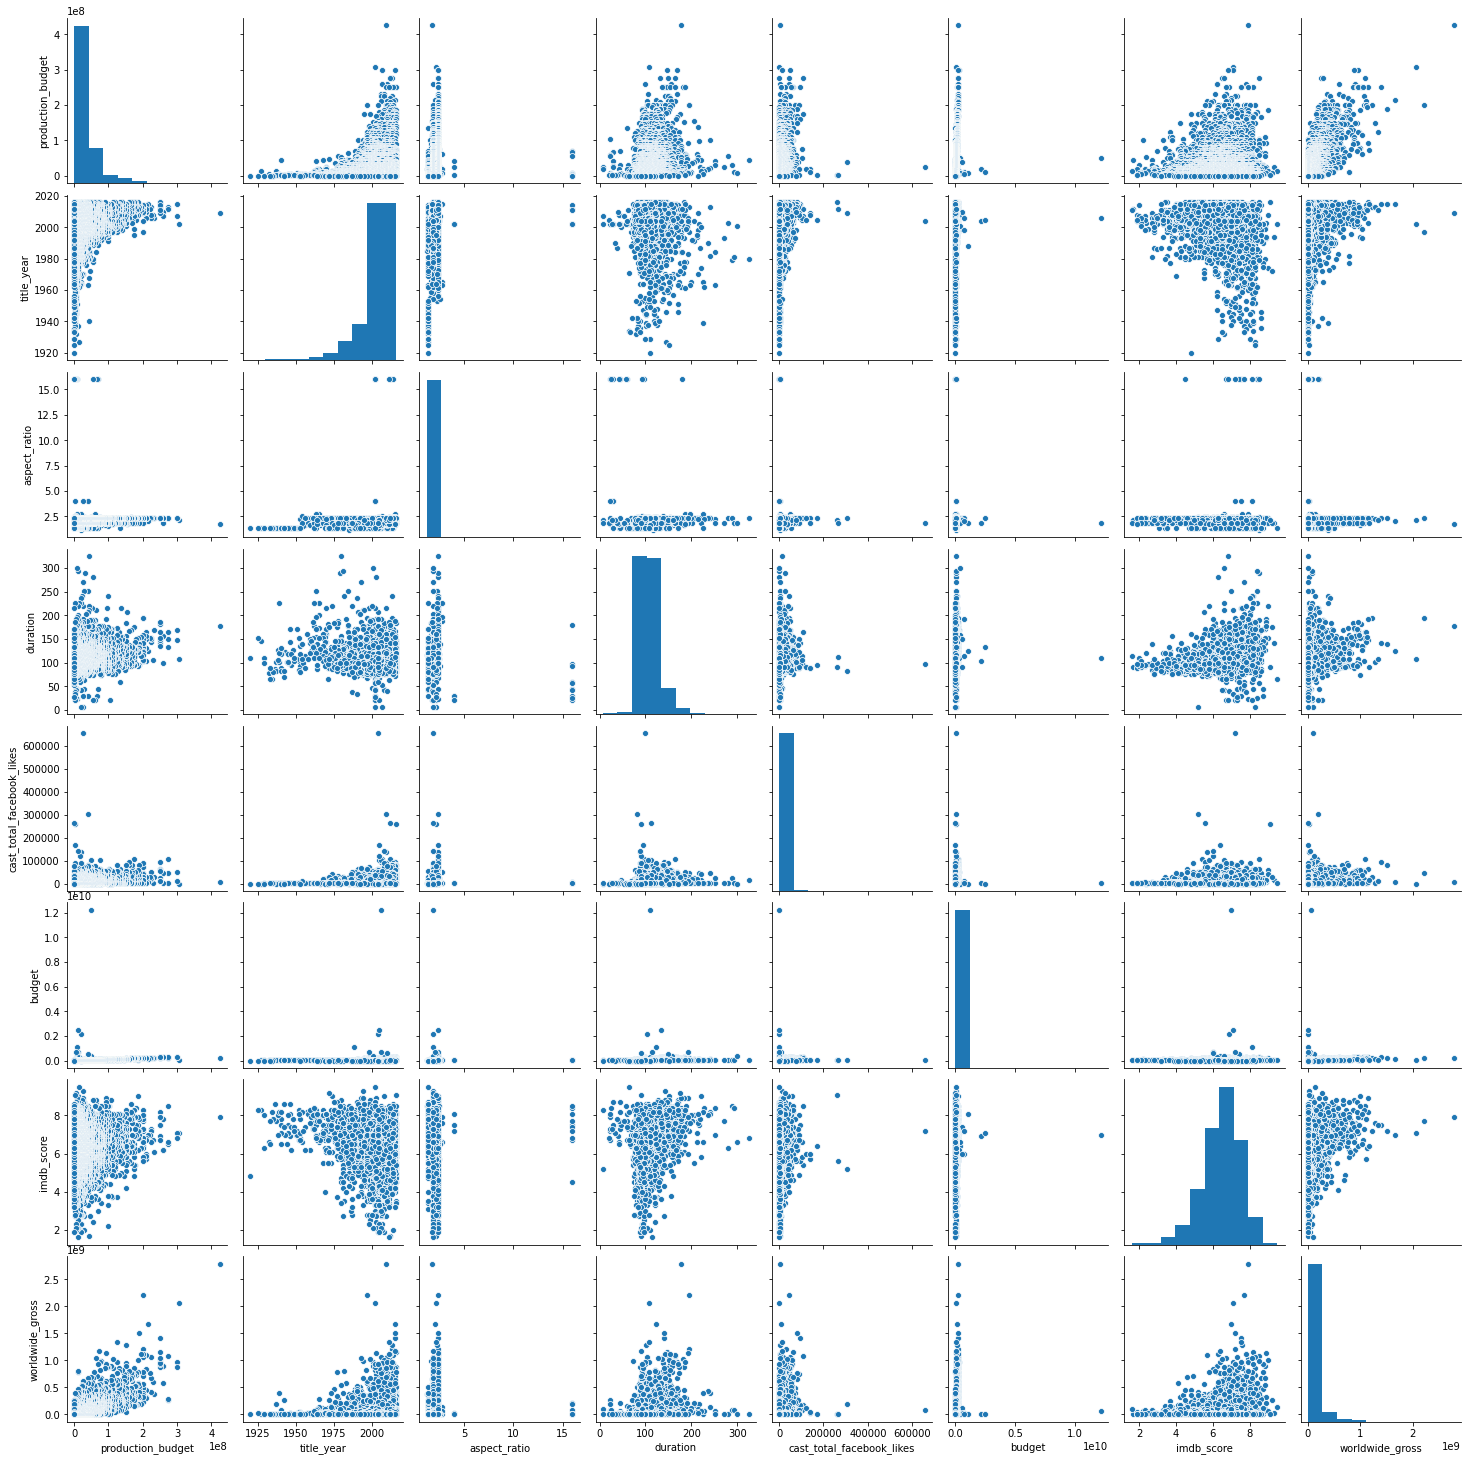

In [35]:
# Estas tecnicas de visualizacion nos permitira entender 2 cosas: 1. la correlacion entre las variables mismas 2. Y la correlacion entre cada
# feature con la variable objetivo, si es que una de nuestras features tiene gran correlacion con la variable objetivo quiere decir que es una
# feature informativa y es ideal para ocuparala en nuestra regresion.

# Si los scatter plots son una diagonal perfecta, en ese caso tendriamos que las variables estan perfectamente correlacionadas.
# En este caso tenemos que la ultima fila, es como se relacionan las demas features con el 'worldwide_gross' o mejor dicho nuestra variable
# objetivo.
import seaborn as sns

Z = pd.concat([X,y],axis=1)
sns.pairplot(Z)

In [0]:
# Con este comando puedo ordenar mis valores en distintos contenedores, entonces iran por rangos, en este caso lo vamos a partir en 8 
# contenedores.
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
Z2 = pd.concat([X,clase],axis=1)

In [40]:
# Aqui basicamente lo que hicimos fue clasificar las peliculas por su 'production_budget'
# Entre mas alta es la clase mas costo la pelicula.
pd.concat([X,clase],axis=1)

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,class
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,5
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,5
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,5
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,5
...,...,...,...,...,...,...,...,...
4099,7000.0,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0,0
4100,7000.0,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3,0
4101,7000.0,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8,0
4102,3967.0,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3,0


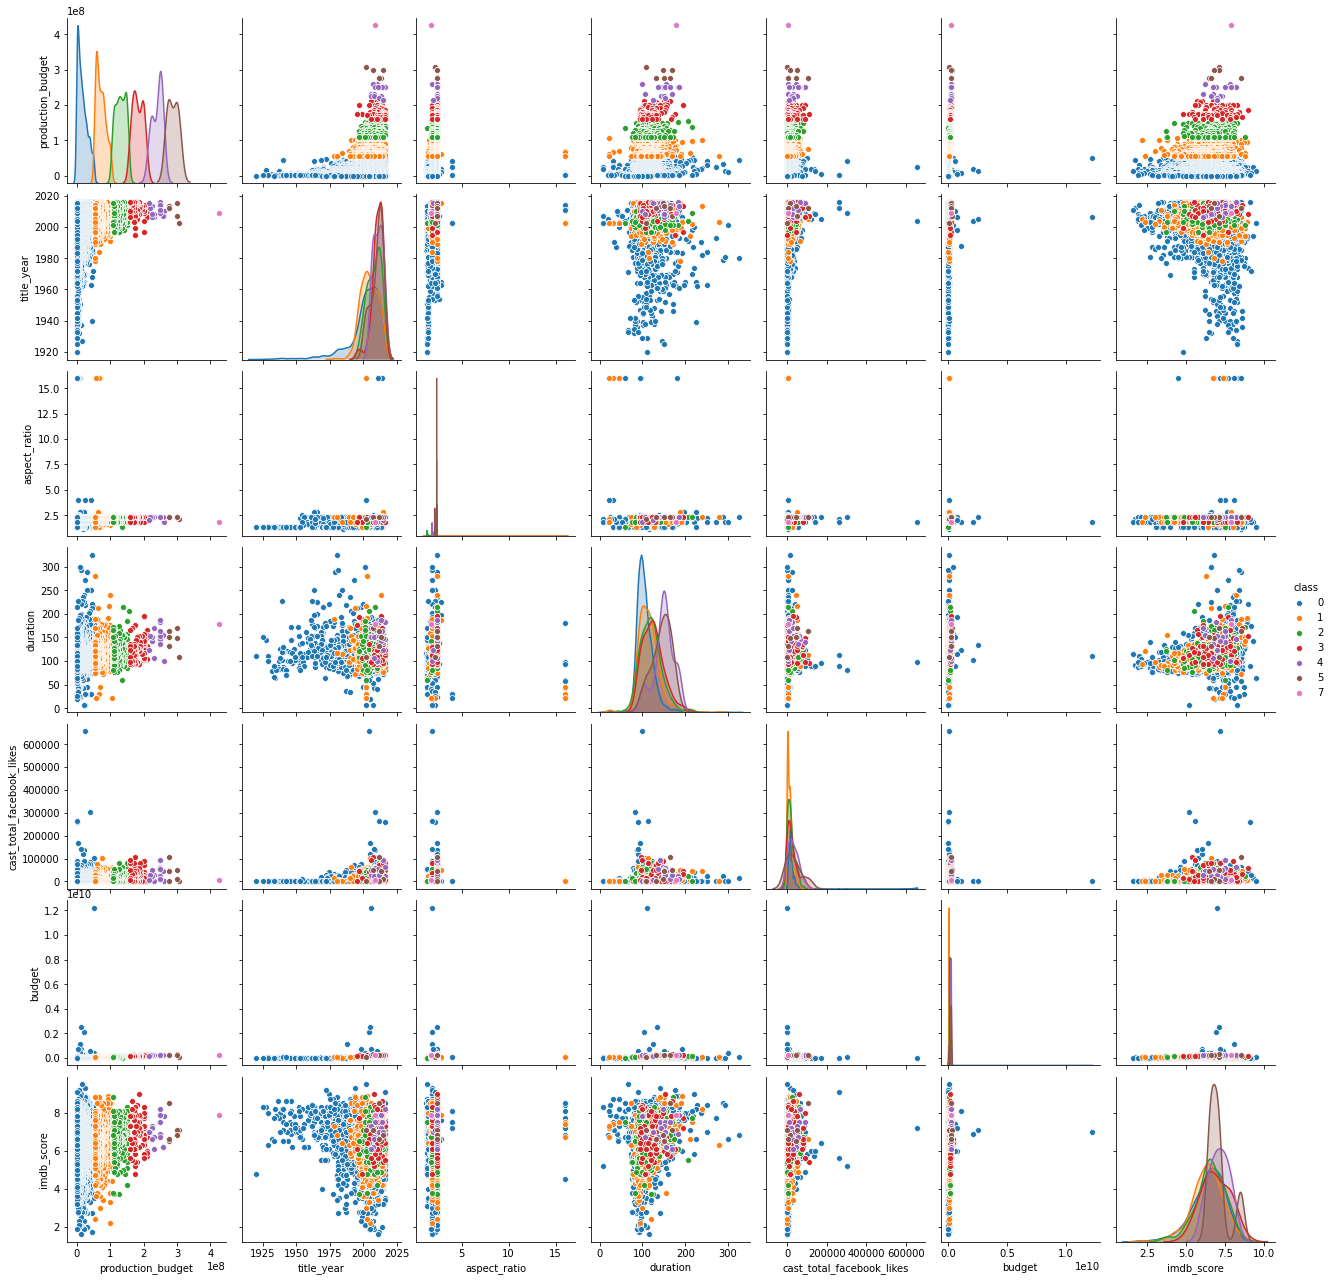

In [41]:
# Pinte los valores segun "class" (class es solo un nombre)

sns.pairplot(Z2,hue='class')

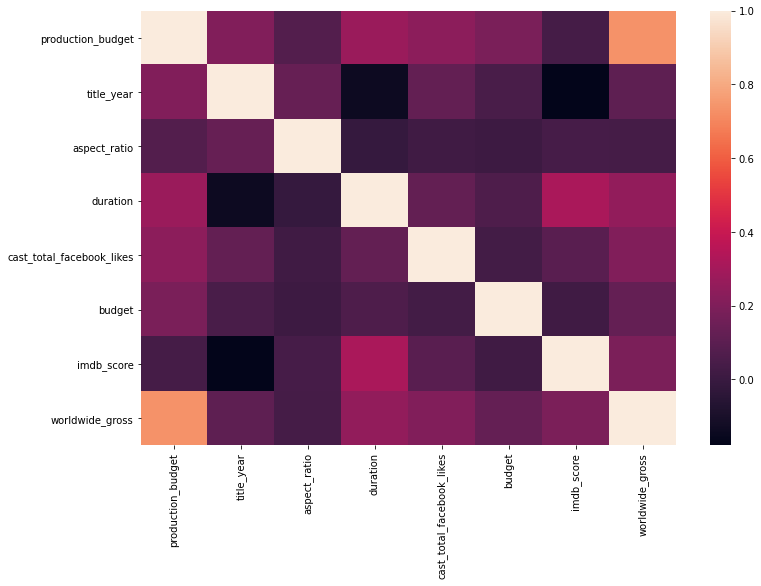

In [42]:
# Aqui me interesa la ultima columna
Z3 = pd.concat([X,y],axis=1)
sns.heatmap(Z3.corr())


De esto concluimos, sin sorpresa, que son muy importantes:

*   production_budget
*   imdb_score

**Metodos de selección automatica de features**

In [43]:
from sklearn.feature_selection import SelectKBest # Hace un analisis univariado en terminos estadisticos, lo cual quiere decir que cada feature,
# va a ser analizada, y se va tratar de ver que tanta informacion aporta, y luego se van a elegir las k mejores
from sklearn.feature_selection import mutual_info_regression # Nos dice la forma de calcular que tanta informacion aporta la feature.
# Entonces se unen estas propiedas, selectkbest necesita de mutual_info_regression como metrica

selector = SelectKBest(mutual_info_regression, k=4) # Le indicamos nuestra metrica que es mutual_info_regression, y cuantas features queremos
# seleccionar en este caso k=4
selector.fit(X,y)

SelectKBest(k=4, score_func=<function mutual_info_regression at 0x7f9056277a60>)

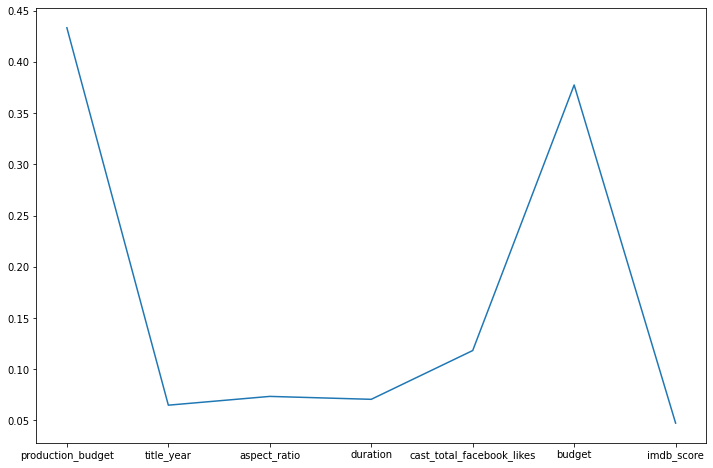

In [45]:
scores = selector.scores_ # Puntaje de que tanta informacion nos puede aportar cada feature
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7),list(X.columns));

Del analisis univariante obtenemos que las mejores features son:

*   production_budget
*   cast_total_facebook_likes
*   budget

**Guardaremos las 5 features entregadas por la interpretación de nuestra regresión Lasso**

In [0]:
# Voy a ver que features, reduciendo la dimension de mis datos, logra tener un mejor rendimiento con Sckilearn
X2 = X[['production_budget','title_year','duration','cast_total_facebook_likes','imdb_score']]
X3 = X[['production_budget','cast_total_facebook_likes','imdb_score']]

**Veamos los resultados del modelo con estas features**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [0]:
cols2 = ['production_budget','title_year','duration','cast_total_facebook_likes','imdb_score']
X2_train, X2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], y_train, y_test

cols3 = ['production_budget','cast_total_facebook_likes','imdb_score']
X3_train, X3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], y_train, y_test

In [51]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train,y_train)
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
# Bajar la dimension no me ayudo particularmente

print(model1.score(X_test,y_test))
print(model2.score(X2_test,y2_test))
print(model3.score(X3_test,y3_test))

0.5976443193286451
0.5962789250226646
0.5969072369016282
